In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Arc

# Introdução a matrizes

Matrizes são representadas como vetores com mais dimensões (shape)

In [2]:
M_zeros = np.zeros((3, 3)) # Matriz de zeros
M_ones = np.ones((3, 3)) # Matriz de 1
M_full = np.full((3, 3), 7) # Matriz todas com 7
M_random = np.random.random((3, 3)) # Matriz com valores aleatórios
M = np.array([ # Matriz 4x3
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
    [10, 11, 12]
])
I_4 = np.eye(4) # Matriz identidade 4x4
D = np.diag([1, 2, 3, 4]) # Matriz diagonal

# Transformar array em matriz (reshape)
# Transposição
print('Matriz M')
print(M)
print('Usando transposição: M.T')
print(M.T)

Matriz M
[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
Usando transposição: M.T
[[ 1  4  7 10]
 [ 2  5  8 11]
 [ 3  6  9 12]]


## Operações com matrizes

Para operar matrizes, as dimensões (shape) devem ser compatíveis

In [3]:
# Soma de Matrizes
M_soma = M_random + M_ones # ambas MxN
print('M_random + M_ones')
print(M_soma)
print('='*50)
# Multiplicação de Matrizes
M_mult = M @ M_ones # PxN e NxQ --> PxQ
print('M @ M_ones')
print(M_mult)
print('='*50)

# Operação com vetores
M_vetor = np.array([1, 2, 3])
M_vetor_soma = M_vetor + M_ones # A ultima dimensão deve ser igual a dimensão do vetor
print('M_vetor + M_ones')
print(M_vetor_soma)
print('='*50)

# Acessar elementos
print('Primeira Linha')
print(M[0])
print('='*50)

print('Primeira coluna')
print(M[:, 0])
print('='*50)

print('Elemento [1, 2]')
print(M[1, 2])
print('='*50)

print('Usando slicing: M[0, 1:3]')
print(M[0, 1:3])
print('='*50)


M_random + M_ones
[[1.40629541 1.83677241 1.31249342]
 [1.07549742 1.03834837 1.25245675]
 [1.5191544  1.79195826 1.75858298]]
M @ M_ones
[[ 6.  6.  6.]
 [15. 15. 15.]
 [24. 24. 24.]
 [33. 33. 33.]]
M_vetor + M_ones
[[2. 3. 4.]
 [2. 3. 4.]
 [2. 3. 4.]]
Primeira Linha
[1 2 3]
Primeira coluna
[ 1  4  7 10]
Elemento [1, 2]
6
Usando slicing: M[0, 1:3]
[2 3]


## Visualização de operação com matrizes

Ângulo entre vetores: 90.0°


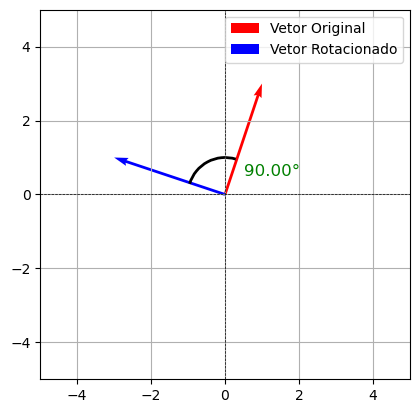

In [4]:
def matriz_rotacao(angulo, rad = False):
    if not rad:
        angulo = np.radians(angulo)
    return np.array([[np.cos(angulo), -np.sin(angulo)],
                     [np.sin(angulo),  np.cos(angulo)]])


vet = np.array([1,3])
M_rot = matriz_rotacao(90)
vet_rot = M_rot @ vet

# Verifica o angulo:
cos = vet.T @ vet_rot / (np.linalg.norm(vet) * np.linalg.norm(vet_rot))
ang_rad = np.arccos(cos)
ang = np.degrees(ang_rad)
print(f'Ângulo entre vetores: {ang}°')


# Visualização
fig, ax = plt.subplots()
plt.quiver(0, 0, vet[0], vet[1], angles='xy', scale_units='xy', scale=1, color='r', label='Vetor Original')
plt.quiver(0, 0, vet_rot[0], vet_rot[1], angles='xy', scale_units='xy', scale=1, color='b', label='Vetor Rotacionado')


# Desenha o arco:
# 4. Calculate the start and end angles for the arc
centro = [0,0]
theta1 = np.rad2deg(np.arctan2(vet[1] - centro[1], vet[0] - centro[0]))
theta2 = np.rad2deg(np.arctan2(vet_rot[1] - centro[1], vet_rot[0] - centro[0]))
angle_arc = Arc(centro, 2, 2, angle=ang_rad, theta1=theta1, theta2=theta2, color='black', linewidth=2)
ax.add_patch(angle_arc)

plt.text(0.5, 0.5, f'{ang:.2f}°', color='green', fontsize=12)
plt.grid()
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.axhline(0, color='black',linewidth=0.5, ls='--')
plt.axvline(0, color='black',linewidth=0.5, ls='--')
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()

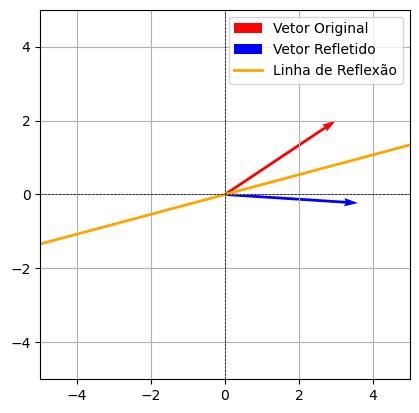

In [5]:
def matriz_reflexao(angulo, rad = False):
    if not rad:
        angulo = np.radians(angulo)
    angulo *= 2
    return np.array([[np.cos(angulo),  np.sin(angulo)],
                     [np.sin(angulo), -np.cos(angulo)]])

def get_linha_reflexao(angulo, xlim = [-5,5], rad=False):
    if not rad:
        angulo = np.radians(angulo)
    m = np.tan(angulo)
    b = 0
    x = np.array(xlim)
    y = m * x + b
    return x, y

angulo_reflexao = 15
vet = np.array([3,2])
M_reflexo = matriz_reflexao(angulo_reflexao)
vet_reflexo = M_reflexo @ vet


# Visualização
fig, ax = plt.subplots()
plt.quiver(0, 0, vet[0], vet[1], angles='xy', scale_units='xy', scale=1, color='r', label='Vetor Original')
plt.quiver(0, 0, vet_reflexo[0], vet_reflexo[1], angles='xy', scale_units='xy', scale=1, color='b', label='Vetor Refletido')
plt.plot(*get_linha_reflexao(angulo_reflexao), color='orange', lw=2, label='Linha de Reflexão')

plt.grid()
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.axhline(0, color='black',linewidth=0.5, ls='--')
plt.axvline(0, color='black',linewidth=0.5, ls='--')
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()

Matriz de Projeção
[[0.64 0.48]
 [0.48 0.36]]


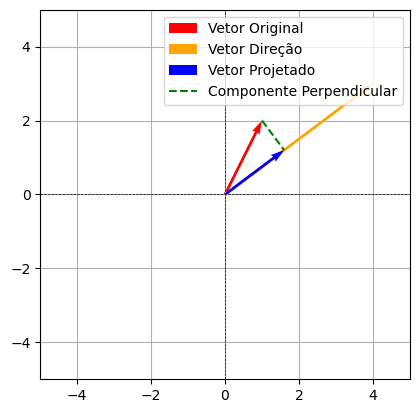

In [19]:
def get_proj_mat(u):
    norm = u.T @ u
    if norm == 0:
        raise ValueError("O vetor não pode ser o vetor zero.")
    proj = np.zeros((2, 2))
    proj[0, 0] = (u[0] * u[0])
    proj[0, 1] = (u[0] * u[1])
    proj[1, 0] = (u[1] * u[0])
    proj[1, 1] = (u[1] * u[1])
    return proj / norm

u = np.array([4, 3])
M_proj = get_proj_mat(u)
print('Matriz de Projeção')
print(M_proj)

vet = np.array([1, 2])
vet_proj = M_proj @ vet


# Visualização
fig, ax = plt.subplots()
plt.quiver(0, 0, vet[0], vet[1], angles='xy', scale_units='xy', scale=1, color='r', label='Vetor Original')
plt.quiver(0, 0, u[0], u[1], angles='xy', scale_units='xy', scale=1, color='orange', label='Vetor Direção')
plt.quiver(0, 0, vet_proj[0], vet_proj[1], angles='xy', scale_units='xy', scale=1, color='b', label='Vetor Projetado')

plt.plot([vet[0], vet_proj[0]], [vet[1], vet_proj[1]], color='green', ls='--', label='Componente Perpendicular')

plt.grid()
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.axhline(0, color='black',linewidth=0.5, ls='--')
plt.axvline(0, color='black',linewidth=0.5, ls='--')
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()